In [3]:
from brian2 import *
%matplotlib inline

Single neuron simulation

Before v = 0.0
After v = 0.7981034820053454
Spike times: [ 8. 31. 54. 77.] ms


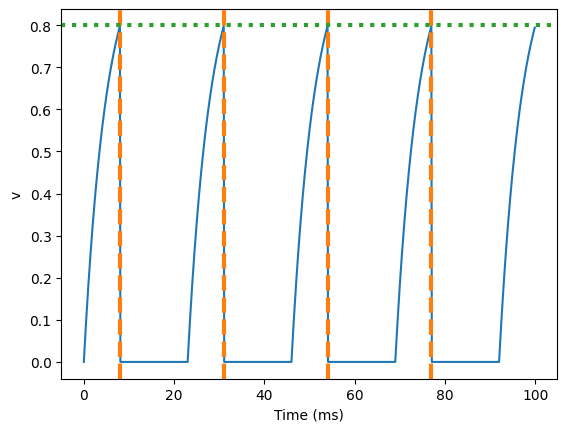

In [17]:
start_scope()

tau = 5*ms
eqs = '''
dv/dt = (1-v)/tau : 1 (unless refractory)
'''

G = NeuronGroup(1, eqs, threshold='v>0.8', reset='v = 0',  refractory=15*ms, method='exact')
spike_mon = SpikeMonitor(G)
M = StateMonitor(G, 'v', record=0)
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])
print('Spike times: %s' % spike_mon.t[:])

plot(M.t/ms, M.v[0]) #velocity value for the first neuron as a function of time

for t in spike_mon.t:
    axvline(t/ms, ls='--', c='C1', lw=3)
axhline(0.8, ls=':', c='C2', lw=3)
xlabel('Time (ms)');
ylabel('v');



Multiple neuron simulation

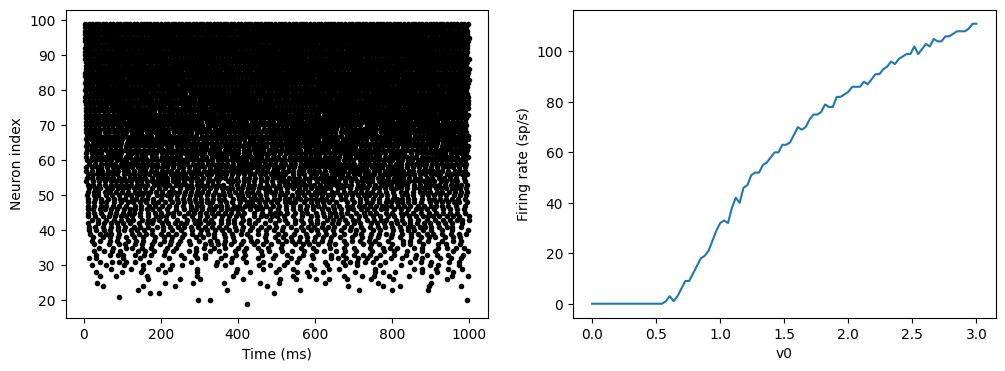

In [13]:
start_scope()

N = 100
tau = 10*ms
v0_max = 3.
duration = 1000*ms
sigma = 0.2


#v0 is a dimensionless per-neuron parameter, xi is a random variable between 0 and 1
eqs = '''
dv/dt = (v0-v)/tau+sigma*xi*tau**-0.5 : 1 (unless refractory)
v0 : 1 
'''

G = NeuronGroup(N, eqs, threshold='v>1', reset='v=0', refractory=5*ms, method='euler')
M = SpikeMonitor(G)

#drive each neuron toward v0 (for greater v0, neurons will fire at a higher rate)
G.v0 = 'i*v0_max/(N-1)'

run(duration)

figure(figsize=(12,4))
subplot(121) #2 by 1 plot grid, 1st plot
plot(M.t/ms, M.i, '.k')
xlabel('Time (ms)')
ylabel('Neuron index')
subplot(122)
plot(G.v0, M.count/duration)
xlabel('v0')
ylabel('Firing rate (sp/s)');

Connecting neurons via synapses